# This notebook we're going to see:
<p> 
    
<ul>
    <li>markets and correlation</li>
    <li>market index creation (divide)</li>
</ul>  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import datetime
import risk_kit as erk
import seaborn as sns
%matplotlib inline

c:\users\home_041\miniconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# auto reload imported modules
%load_ext autoreload
%autoreload 2

### getting data to make the weights

#### save into erk risk kit

In [3]:
def get_ind_size():
    """
    get industry size
    """
    ind = pd.read_csv('data/ind30_m_size.csv', header=0, index_col=0, parse_dates = True)
    ind.index = pd.to_datetime(ind.index, format = "%Y%m").to_period('M')
    ind.columns= ind.columns.str.strip()
    return ind

def get_ind_n():
    """
    get industry n firms
    """
    ind = pd.read_csv('data/ind30_m_nfirms.csv', header=0, index_col=0, parse_dates = True)
    ind.index = pd.to_datetime(ind.index, format = "%Y%m").to_period('M')
    ind.columns= ind.columns.str.strip()
    return ind

### loading data

In [4]:
ind_size = erk.get_ind_size()
ind_n = erk.get_ind_n()
ind_return = erk.get_ind_returns()

In [5]:
l = 'size n return'.split()

### market cap index

In [6]:
ind_mktcap = ind_n*ind_size

In [7]:
total_mktcap = ind_mktcap.sum(axis = 'columns')

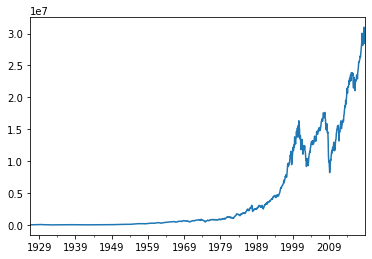

In [8]:
total_mktcap.plot()

In [9]:
ind_mktcap

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,655086.88,248864.40,246251.37,359322.24,34986.00,436335.51,291114.00,3101280.74,527004.08,18460.08,...,1194867.48,4823187.60,3246634.04,302188.62,702401.00,329067.65,2282934.94,428784.93,4930872.78,1432052.70
2018-09,650961.36,243994.20,232888.44,369482.88,33346.32,447087.81,305995.50,3233033.92,525412.88,19156.88,...,1229361.27,5069913.20,3562212.72,299831.35,720451.90,340645.57,2486473.99,442374.34,5037628.51,1473543.50
2018-10,638821.15,243073.92,242110.77,366408.00,32533.41,451597.38,309179.15,3288588.12,462370.35,17928.00,...,1250164.08,5043137.32,3546678.80,298376.14,727665.40,330246.60,2500872.76,453366.32,4930387.44,1488960.20
2018-11,644666.55,239183.23,261239.37,307688.02,30333.87,446944.29,277819.13,2990934.10,403502.22,13304.88,...,1237481.19,4559456.44,3258043.60,265650.12,656465.31,303814.75,2244299.82,445210.94,4583277.60,1399224.32


### cap weights

In [10]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis = 'rows')

In [11]:
ind_capweight

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,0.021873,0.008309,0.008222,0.011997,0.001168,0.014569,0.009720,0.103549,0.017596,0.000616,...,0.039896,0.161042,0.108402,0.010090,0.023453,0.010987,0.076225,0.014317,0.164637,0.047815
2018-09,0.021005,0.007873,0.007515,0.011923,0.001076,0.014427,0.009874,0.104324,0.016954,0.000618,...,0.039669,0.163597,0.114947,0.009675,0.023248,0.010992,0.080234,0.014275,0.162556,0.047549
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159


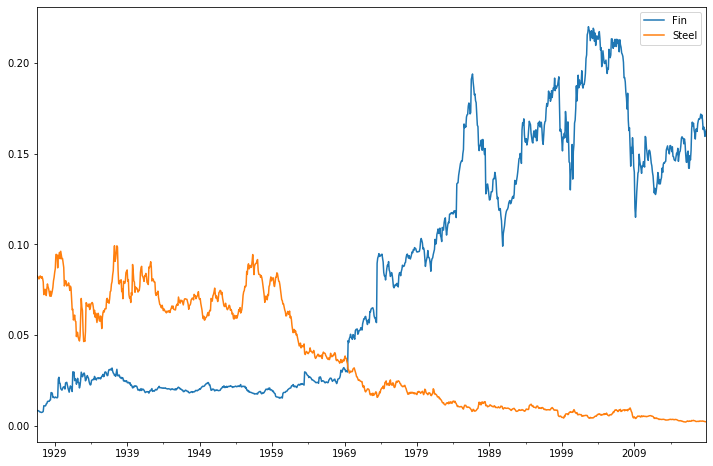

In [12]:
ind_capweight[['Fin','Steel']].plot(figsize = (12,8))

### total market index

In [13]:
total_mktreturn = (ind_capweight*ind_return).sum(axis= 'columns')

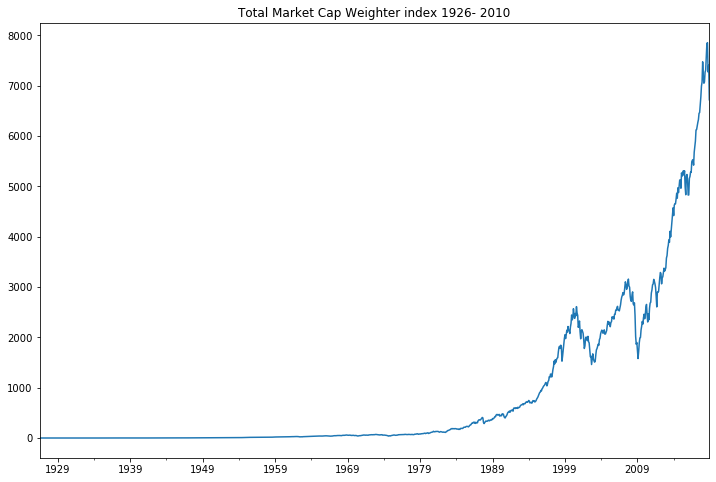

In [14]:
(total_mktreturn+1).cumprod().plot(figsize = (12,8),
                                   title = 'Total Market Cap Weighter index 1926- 2010')

In [15]:
total_market_index = erk.drawdown(total_mktreturn).Wealth

### rolling 

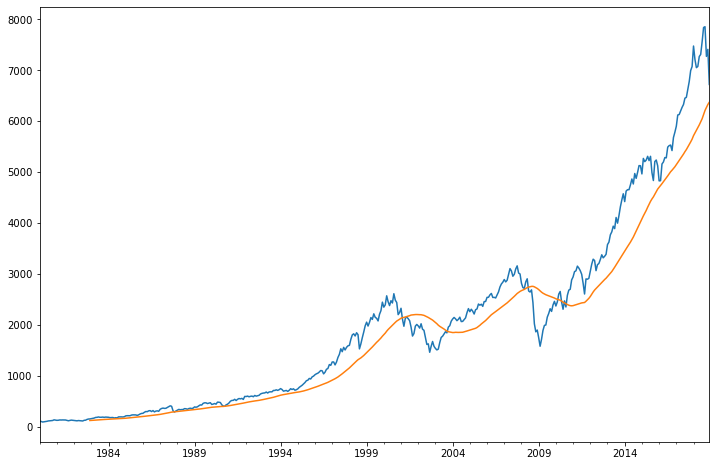

In [16]:
total_market_index['1980':].plot(figsize = (12,8))
total_market_index['1980':].rolling(window=36).mean().plot(figsize = (12,8))

In [22]:
tmi_tr36rets = total_market_index.rolling(window = 36).aggregate(erk.annualize_rets, periods_per_year = 12)

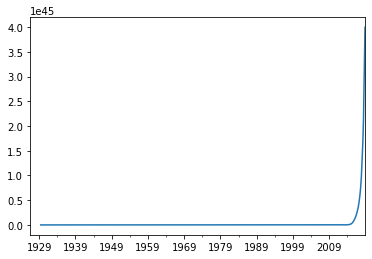

In [24]:
tmi_tr36rets.plot()